In [97]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv(r'C:\Users\m\AppData\Local\Programs\Python\Python36-32\titanic\train.csv')

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


## Ticket Class

#### Number of passengers in each Ticket Class

In [230]:
df.Pclass.map({1: '1 - 1st class', 2: '2 - 2nd class', 3: '3 - 3rd class'}).value_counts()

3 - 3rd class    491
1 - 1st class    216
2 - 2nd class    184
Name: Pclass, dtype: int64

Text(0,0.5,'')

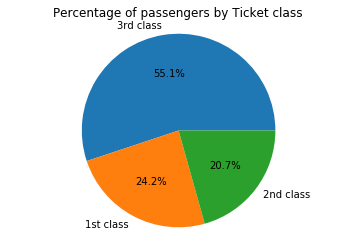

In [102]:
df.Pclass.map({1: '1st class', 2: '2nd class', 3: '3rd class'}).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of passengers by Ticket class')
plt.axis('equal')
plt.ylabel('')

#### Number of survivors per Ticket Class

In [103]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0.5,1,'Percentage of survivors in each Class')

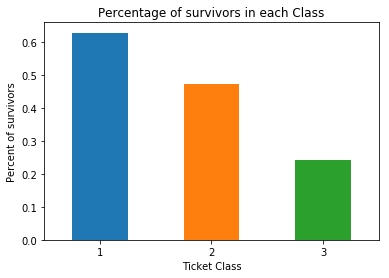

In [104]:
df.groupby('Pclass').Survived.mean().plot(kind='bar', rot=0)
plt.xlabel('Ticket Class')
plt.ylabel('Percent of survivors')
plt.title("Percentage of survivors in each Class")

#### Number of passengers by gender in each Ticket Class

In [105]:
pd.crosstab(df.Pclass, df.Sex)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


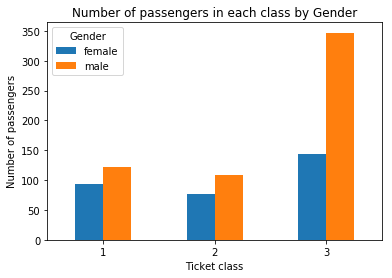

In [106]:
pd.crosstab(df.Pclass, df.Sex).plot(kind='bar', rot=0)
plt.xlabel('Ticket class')
plt.ylabel('Number of passengers')
plt.title('Number of passengers in each class by Gender')
plt.legend(title='Gender')

## Gender

#### Number of passengers by Gender

In [107]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0,0.5,'')

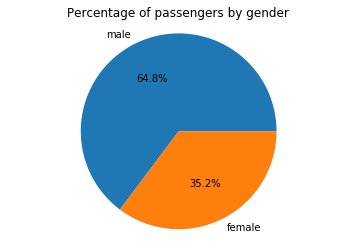

In [108]:
df.Sex.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of passengers by gender')
plt.axis('equal')
plt.ylabel('')

#### Number of Survivors by Gender

In [109]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


Text(0.5,1,'Percentage of survivors by Gender')

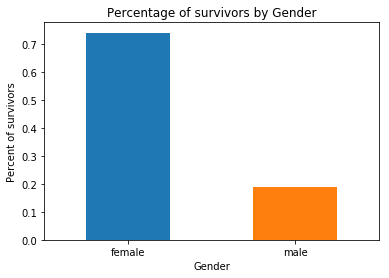

In [110]:
df.groupby('Sex').Survived.mean().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors by Gender')

#### Number of survivors by Gender in each Ticket class

In [111]:
pd.crosstab([df.Sex, df.Pclass], df.Survived)

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

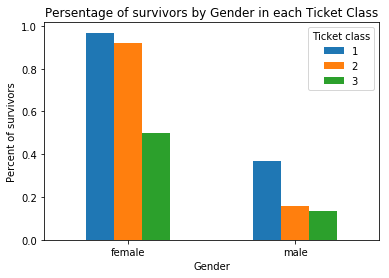

In [112]:
df.groupby(['Sex', 'Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Gender')
plt.ylabel('Percent of survivors')
plt.title('Persentage of survivors by Gender in each Ticket Class')
plt.legend(title='Ticket class')

## Age

#### Distribution of passengers by age

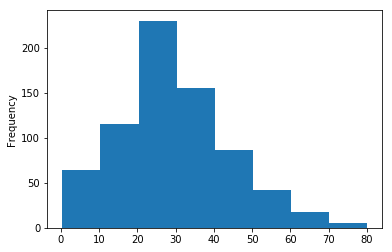

In [113]:
df.Age.plot(kind='hist', bins=8)

#### Percent of survivors in passengers under age of 20 by Gender in each Ticket class

In [114]:
age = 20
df[df.Age < age].groupby(['Sex','Pclass']).Survived.value_counts().unstack()

Survived          0     1
Sex    Pclass            
female 1        1.0  13.0
       2        NaN  16.0
       3       21.0  24.0
male   1        3.0   4.0
       2        9.0  10.0
       3       51.0  12.0

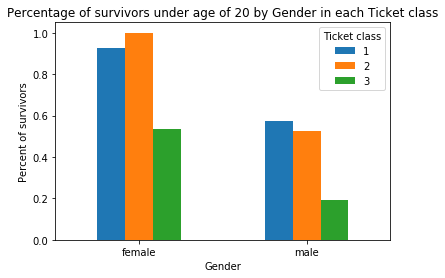

In [115]:
df[df.Age < age].groupby(['Sex','Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Gender')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors under age of {} by Gender in each Ticket class'.format(age))
plt.legend(title='Ticket class', loc=1)

#### Percent of survivors in passengers between ages of 20 and 30 by Gender in each Ticket class

In [116]:
min_age = 20
max_age = 30
df[(df.Age >= min_age) & (df.Age <= max_age)].groupby(['Sex','Pclass']).Survived.value_counts().unstack()

Survived          0     1
Sex    Pclass            
female 1        1.0  20.0
       2        3.0  25.0
       3       18.0  16.0
male   1       10.0   9.0
       2       33.0   NaN
       3       93.0  17.0

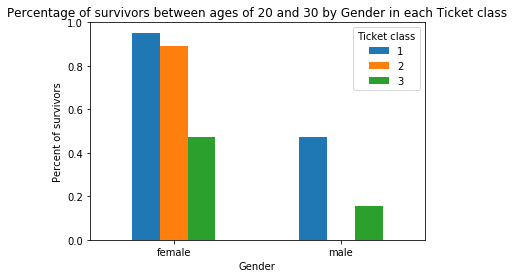

In [117]:
df[(df.Age >= min_age) & (df.Age <= max_age)].groupby(['Sex','Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Gender')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors between ages of {} and {} by Gender in each Ticket class'.format(min_age, max_age))
plt.legend(title='Ticket class', loc=1)

#### Number of survivors by Age group
Age groups:
- child,  0-17 yo
- adult,  18-59 yo
- elderly,  60+ yo

In [118]:
def age_group(age):
    age_group = {'child': (0, 18),
                 'adult': (18, 60), 
                 'elderly': (60, 120)}
    for group, age_range in age_group.items():
        if age >= age_range[0] and age < age_range[1]:
            return group
df['Age_group'] = df.Age.map(age_group, na_action='ignore')
df['Age_group'] = pd.Categorical(df.Age_group, ordered=True, 
                                 categories=['child', 'adult', 'elderly'])

In [119]:
pd.crosstab(df.Age_group, df.Survived)

Survived,0,1
Age_group,,
child,52,61
adult,353,222
elderly,19,7


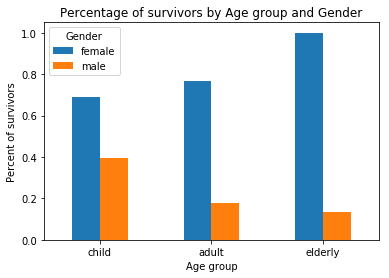

In [120]:
df.groupby(['Age_group', 'Sex']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Age group')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors by Age group and Gender')
plt.legend(title='Gender')

#### Percent of survivors by Age group in each Ticket class

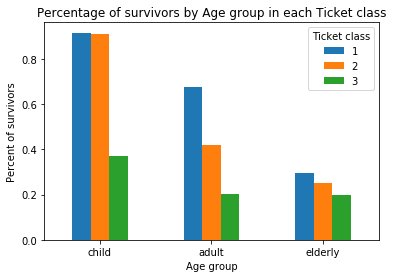

In [121]:
df.groupby(['Age_group', 'Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Age group')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors by Age group in each Ticket class')
plt.legend(title='Ticket class')

## Embarkation Port

#### Number of passengers embarked in each port

In [188]:
df.Embarked.map({'C': 'C - Cherbourg', 'Q': 'Q - Queenstown', 'S': 'S - Southampton'}).value_counts()

S - Southampton    644
C - Cherbourg      168
Q - Queenstown      77
Name: Embarked, dtype: int64

Text(0,0.5,'')

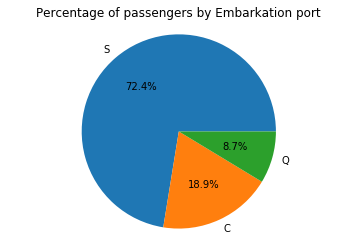

In [123]:
df.Embarked.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of passengers by Embarkation port')
plt.axis('equal')
plt.ylabel('')

#### Number of passengers embarked in each port by Ticket Class

In [124]:
pd.crosstab(df.Embarked, df.Pclass)

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


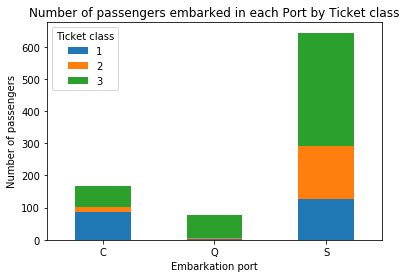

In [125]:
pd.crosstab(df.Embarked, df.Pclass).plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Embarkation port')
plt.ylabel('Number of passengers')
plt.title('Number of passengers embarked in each Port by Ticket class')
plt.legend(title='Ticket class')

#### Number of survivors by Embarkation port

In [126]:
pd.crosstab(df.Embarked, df.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


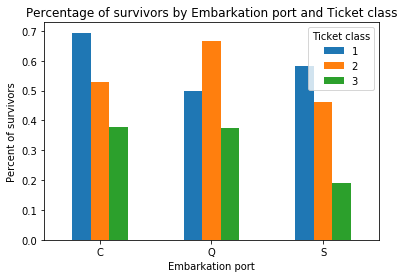

In [127]:
df.groupby(['Embarked', 'Pclass']).Survived.mean().unstack().plot.bar(rot=0)
plt.xlabel('Embarkation port')
plt.ylabel('Percent of survivors')
plt.title('Percentage of survivors by Embarkation port and Ticket class')
plt.legend(title='Ticket class')

## Name

#### Survaval chance by last name

In [160]:
df['Last_name'] = df.Name.str.extract(r'^(.+),')

In [178]:
lnames_surv_chance = dict(df.groupby('Last_name').Survived.mean())

In [173]:
df['Last_name_survival'] = df['Last_name'].map(lnames_surv_chance)

In [182]:
pd.crosstab(df.Last_name, df.Survived).sort_values(1, ascending=False).head(10)

Survived,0,1
Last_name,,
Carter,2,4
Baclini,0,4
Johnson,3,3
Kelly,1,3
Harper,1,3
Asplund,1,3
Richards,0,3
Brown,1,3
Quick,0,2


In [183]:
pd.crosstab(df.Last_name, df.Survived).sort_values(0, ascending=False).head(10)

Survived,0,1
Last_name,,
Andersson,7,2
Sage,7,0
Panula,6,0
Skoog,6,0
Goodwin,6,0
Rice,5,0
Gustafsson,4,0
Palsson,4,0
Ford,4,0


## Siblings and Spouses

#### Number of survivors by number of Siblings/Spouses

In [184]:
pd.crosstab(df.SibSp, df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


#### Number of survivors by number of Siblings/Spouses
- 0: **zero** Siblings/Spouses aboard 
- &gt;=1: **one or more** Siblings/Spouses aboard

Text(0,0.5,'')

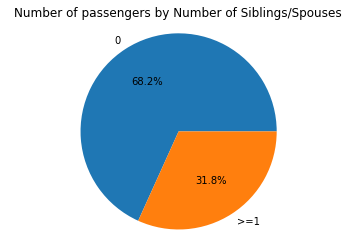

In [208]:
df['bSibSp'] = df.SibSp.map(lambda x: '0' if x==0 else '>=1')
df.bSibSp.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of passengers by Number of Siblings/Spouses')
plt.axis('equal')
plt.ylabel('')

In [209]:
pd.crosstab(df.bSibSp, df.Survived)

Survived,0,1
bSibSp,,
0,398,210
>=1,151,132


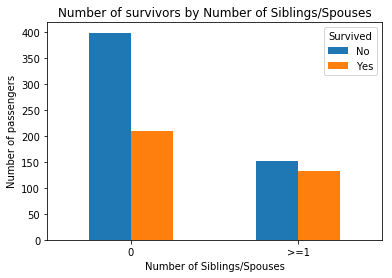

In [210]:
pd.crosstab(df.bSibSp, df.Survived).plot(kind='bar', rot=0)
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Number of passengers')
plt.title('Number of survivors by Number of Siblings/Spouses')
plt.legend(title='Survived', labels=['No', 'Yes'])

#### Number of Siblings/Spouses by Ticket Class

In [239]:
pd.crosstab(df.bSibSp, df.Pclass)

Pclass,1,2,3
bSibSp,,,
0,137,120,351
>=1,79,64,140


In [220]:
df.groupby(['bSibSp', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
bSibSp,,,
0,0.562044,0.416667,0.236467
>=1,0.746835,0.578125,0.257143


In [229]:
df.groupby('Pclass').Survived.mean().to_frame().transpose()

Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


#### Percentage of survivors by Number of Siblings/Spouses per Gender

In [219]:
pd.crosstab(df.bSibSp, df.Sex)

Sex,female,male
bSibSp,,
0,174,434
>=1,140,143


In [233]:
df.groupby(['bSibSp', 'Sex']).Survived.mean().unstack()

Sex,female,male
bSibSp,,
0,0.787356,0.168203
>=1,0.685714,0.251748


In [234]:
df.groupby('Sex').Survived.mean().to_frame().transpose()

Sex,female,male
Survived,0.742038,0.188908


#### Percentage of survivors by Number of Siblings/Spouses per Gender and Age group

In [252]:
df.groupby(['bSibSp', 'Sex', 'Age_group']).Survived.mean().unstack()

Age_group         child     adult   elderly
bSibSp Sex                                 
0      female  0.833333  0.788136  1.000000
       male    0.421053  0.172414  0.111111
>=1    female  0.580645  0.738095  1.000000
       male    0.384615  0.204819  0.250000

## Parents/Children

#### Number of survivors by number of Parents/Children aboard

In [241]:
pd.crosstab(df.Parch, df.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


#### Number of survivors by number of Parents/Children
- 0: **zero** Parents/Children aboard 
- &gt;=1: **one or more** Parents/Children aboard

Text(0,0.5,'')

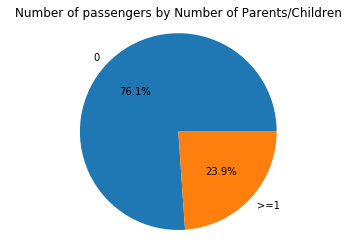

In [242]:
df['bParch'] = df.Parch.map(lambda x: '0' if x==0 else '>=1')
df.bParch.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of passengers by Number of Parents/Children')
plt.axis('equal')
plt.ylabel('')

In [243]:
pd.crosstab(df.bParch, df.Survived)

Survived,0,1
bParch,,
0,445,233
>=1,104,109


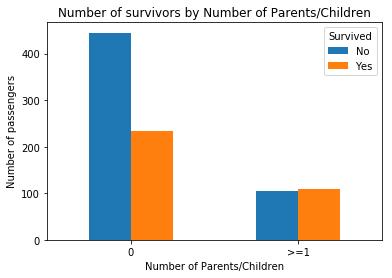

In [244]:
pd.crosstab(df.bParch, df.Survived).plot(kind='bar', rot=0)
plt.xlabel('Number of Parents/Children')
plt.ylabel('Number of passengers')
plt.title('Number of survivors by Number of Parents/Children')
plt.legend(title='Survived', labels=['No', 'Yes'])

#### Number of Parents/Children by Ticket Class

In [245]:
pd.crosstab(df.bParch, df.Pclass)

Pclass,1,2,3
bParch,,,
0,163,134,381
>=1,53,50,110


In [246]:
df.groupby(['bParch', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
bParch,,,
0,0.607362,0.358209,0.225722
>=1,0.698113,0.780000,0.300000


In [247]:
df.groupby('Pclass').Survived.mean().to_frame().transpose()

Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


#### Number of Parents/Children by Gender

In [248]:
pd.crosstab(df.bParch, df.Sex)

Sex,female,male
bParch,,
0,194,484
>=1,120,93


In [249]:
df.groupby(['bParch', 'Sex']).Survived.mean().unstack()

Sex,female,male
bParch,,
0,0.788660,0.165289
>=1,0.666667,0.311828


In [250]:
df.groupby('Sex').Survived.mean().to_frame().transpose()

Sex,female,male
Survived,0.742038,0.188908


#### Percentage of survivors by Number of Parents/Children per Gender and Age group

In [251]:
df.groupby(['bParch', 'Sex', 'Age_group']).Survived.mean().unstack()

Age_group         child     adult   elderly
bParch Sex                                 
0      female  0.823529  0.772727  1.000000
       male    0.133333  0.184524  0.117647
>=1    female  0.631579  0.757143       NaN
       male    0.488372  0.135135  0.200000